## 로지스틱 회귀
- 반응 변수가 범주형인 경우에 적용하는 회귀 분석을 로지스틱 회귀 분석이라 한다. 
- 반응변수 Y를 직접 모델링 하지 않고 Y가 특정 범주에 속하는 확률을 모델링 한다.

In [106]:
import pandas as pd
import numpy as np
## 데이터 로드
body=pd.read_csv('./data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [107]:
## binary 형태로 데이터 변환
## 이진 분류 형태로 전처리
body['gender']=np.where(body['gender']=='M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [108]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x=body[feature_columns]
y=body['class_1']

train_x, test_x, train_y, test_y=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [109]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_x, train_y)

LogisticRegression()

In [110]:
## 확률 추정 로그 예측
proba=pd.DataFrame(logR.predict_proba(train_x))
## confidence score 구하기 x=0인 Hyperplane을 기준으로 양수/음수에 위치하는지 얼만큼 떨어져있는지
cs=logR.decision_function(train_x)

df=pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A','A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,2.346716e-08,-17.567664
1,1.000000,8.301038e-08,-16.304300
2,1.000000,9.841311e-08,-16.134092
3,1.000000,1.015135e-07,-16.103074
4,1.000000,1.489483e-07,-15.719666
...,...,...,...
9370,0.002398,9.976025e-01,6.030909
9371,0.002205,9.977953e-01,6.114964
9372,0.002133,9.978667e-01,6.147972
9373,0.001145,9.988546e-01,6.770849


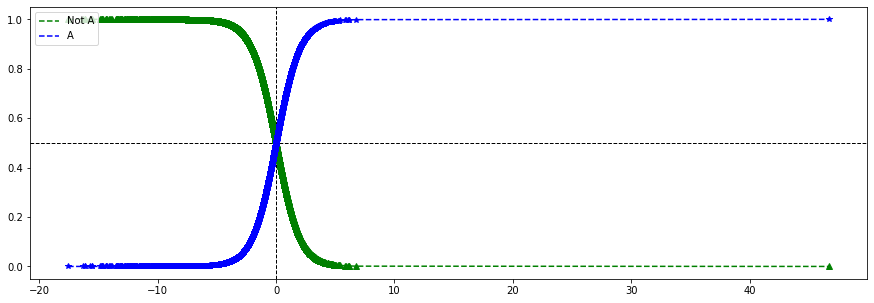

In [111]:
import matplotlib.pyplot as plt
## confidence score 에 따른 클래스 확률값을 매칭시키면 A 클래스에 
# 속한 추정확률과 결정경계를 얻을수 있다. 
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
## 분류 모델의 성능평가
pred=logR.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2768  246]
 [ 349  655]]


정확도	85.19%
정밀도	72.7%
재현율	65.24%
F1	68.77%


### 소프트맥스 회귀
- 2개 이상의 클래스인 다중 클래스를 지원하도록 일반화 가능
- 이 과정을 다중로지스틱 회귀, 소프트맥스 회귀라 한다. 

In [114]:
body = pd.read_csv('./data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [115]:
# gender 변수 전처리
body['gender']=np.where(body['gender']=='M', 0, 1)
# class 변수 전처리
mapping={'A':0, 'B':1, 'C':2, 'D':3}
body['class_2']=body['class'].map(mapping)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [116]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_2']))
x=body[feature_columns]
y=body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [117]:
from sklearn.linear_model import LogisticRegression
## multi_class 클래스의 타입을 지정 ovr는 바이너리, multinomial은 다중 클래스 기본값은 auto
## solver 최적화 문제를 푸는 해를 구할 때 사용할 알고리즘 지정
## C 정규화 강도의 역수
softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial')

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred=softm.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]


정확도	59.91%


In [119]:
softm.predict([test_x.iloc[-1,:]])

array([0], dtype=int64)

In [120]:
softm.predict_proba([test_x.iloc[-1,:]])

array([[0.62639706, 0.31190216, 0.06015632, 0.00154446]])